# <center>Housing Analysis</center>

## Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2


### Simple Linear Regression

Estimates relationship between one independent variable and one dependent variable.

In [8]:
X = df['Rooms'] # independent var
y = df['Value'] # dependent var

In [9]:
X = sm.add_constant(X) # add a constant for X
lm = sm.OLS(y, X).fit() # ordinary least squares

In [13]:
lm.predict(X)

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [14]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 22 May 2023   Prob (F-statistic):           2.49e-74
Time:                        18:55:52   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# y = mx + c

y_pred = X['Rooms']*9.1021 + (-34.6706)

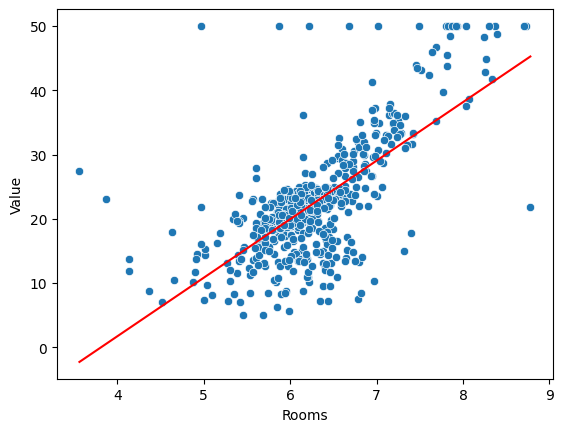

In [18]:
sns.scatterplot(x=X['Rooms'], y=y)
sns.lineplot(x=X['Rooms'], y=y_pred, color='r')

plt.show()

### Multiple Linear Regression

In [20]:
X = df[['Rooms', 'Distance']]
y = df['Value']

In [21]:
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.84e-75
Time:                        19:04:26   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.000     -39.786     -29.486
Rooms          8.8014      0.424     20.780      0.000       7.969       9.634
Distance       0.4888      0.141      3.459      0.001       0.211       0.767
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
lm.predict(X)

0      25.232623
1      24.305975
2      31.030253
3      29.919727
4      31.231138
         ...    
501    24.603318
502    20.346831
503    27.822178
504    26.328552
505    19.661029
Length: 506, dtype: float64